# Business Understanding

#### Find the most and least popular places to stay in Boston
#### Analyze the Airbnb price variations over different places in Boston
#### Study some factors affects Airbnb prices in Bston

In [61]:
# Importing the libraries

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

# Data Understanding
Understanding the data obtained from kaggle.com

In [62]:
# dataframe input

df_listings = pd.read_csv('listings.csv')
df_calendar = pd.read_csv('calendar.csv')
df_reviews = pd.read_csv('reviews.csv')

In [63]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [64]:
df_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [65]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


## Q1. What are some of the most popular places in Boston?

# Data Cleaning and Preperation
Filtering the columns to do the analysis required to answer the first question, removing extra symbols, converting data types when required and removing rows with Nan values

In [66]:
# making a new dataframe which contains all the columns needed later in this study

df1 = df_listings[['id', 'name',  'host_listings_count', 'host_total_listings_count',   'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',  'zipcode', 
     'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 
       'price',  'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 
         'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
         'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month']]

In [67]:
# set the city to Boston to remove data for other cities
# First trying to find most and least popular places on basis of number of views and listings.
# creating new dataframe number_df1 containing data needed to find popular places

df1 = df1[df1['city']=='Boston']
number_df1 = df1[['id', 'host_listings_count', 'zipcode', 'neighbourhood_cleansed','number_of_reviews','calculated_host_listings_count', 'reviews_per_month']]
number_df1

,id,host_listings_count,zipcode,neighbourhood_cleansed,number_of_reviews,calculated_host_listings_count,reviews_per_month
0,12147973,1,02131,Roslindale,0,1,NaN
1,3075044,1,02131,Roslindale,36,1,1.30
2,6976,1,02131,Roslindale,41,1,0.47
3,1436513,1,NaN,Roslindale,1,1,1.00
4,7651065,1,02131,Roslindale,29,1,2.25
...,...,...,...,...,...,...,...
3534,8921130,1,02134,Allston,2,1,0.26
3535,10436811,1,02134,Allston,0,1,NaN
3557,14604429,1,NaN,Longwood Medical Area,0,1,NaN
3559,12915510,1,02129,Charlestown,4,1,1.28


In [68]:
number_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3381 entries, 0 to 3562
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3381 non-null   int64  
 1   host_listings_count             3381 non-null   int64  
 2   zipcode                         3345 non-null   object 
 3   neighbourhood_cleansed          3381 non-null   object 
 4   number_of_reviews               3381 non-null   int64  
 5   calculated_host_listings_count  3381 non-null   int64  
 6   reviews_per_month               2680 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 211.3+ KB


In [72]:
## dropping rows with null in 'zipcode'

number_df1 = number_df1.dropna(axis = 0, subset = ['zipcode'])

# Exploratory Data Analysis
Plotting the results of analysis, questions will be explained in detail in medium article

In [90]:
def custom_plot(df, group_by, column_, aggre, xlab, ylab, title):
    ''''
    Function: for plotting bar graphs
    INPUT:
    df: dataframe
    groupby: column you want to group by the plot
    column_: value to be plotted of
    aggre: type of aggregate operation needed to be made, ex. ['sum'], ['mean']
    xlab: x-axis label
    ylab: y-axis label
    title: Title for the bar plot
    ''''
    
    df.groupby(group_by)[column_].agg(aggre).plot.bar(color = 'orange', figsize =(12,6),title = title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

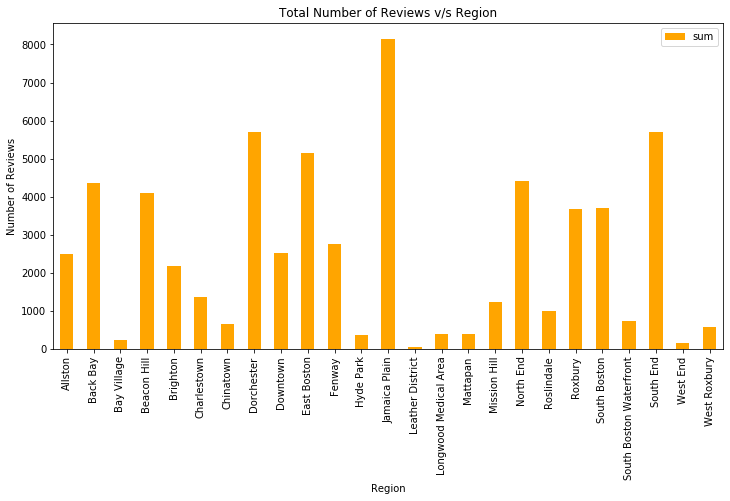

In [91]:
# plotting total number of reviews for all places in Boston

custom_plot(number_df1, 'neighbourhood_cleansed', 'number_of_reviews', ['sum'], 'Region','Number of Reviews', 'Total Number of Reviews v/s Region' )


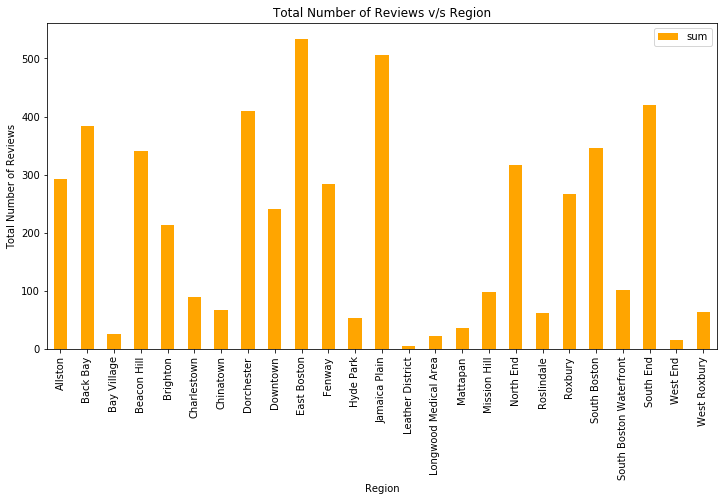

In [92]:
## plotting monthly number of reviews for all places in Boston

custom_plot(number_df1, 'neighbourhood_cleansed', 'reviews_per_month', ['sum'], 'Region','Total Number of Reviews', 'Total Number of Reviews v/s Region' )



## Q2. What is the average price per zipcode in Boston and what are some of the cheapest and most expensive places to stay in Boston?

# Data Cleaning and Preperation
Filtering the columns to do the analysis required to answer the first question, removing extra symbols, converting data types when required and removing rows with Nan values

In [75]:
# creating new df price_df1 to compare Airbnb prices in city

price_df1 = df1[['id', 'zipcode', 'neighbourhood_cleansed', 'price', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms']]
price_df1.head()

,id,zipcode,neighbourhood_cleansed,price,property_type,room_type,accommodates,bathrooms,bedrooms
0,12147973,02131,Roslindale,$250.00,House,Entire home/apt,4,1.5,2.0
1,3075044,02131,Roslindale,$65.00,Apartment,Private room,2,1.0,1.0
2,6976,02131,Roslindale,$65.00,Apartment,Private room,2,1.0,1.0
3,1436513,NaN,Roslindale,$75.00,House,Private room,4,1.0,1.0
4,7651065,02131,Roslindale,$79.00,House,Private room,2,1.5,1.0


In [76]:
# removing symbols  '$' and ',' present in prices column of price_df1

price_df1['price']= price_df1['price'].str.replace('$','')
price_df1['price']= price_df1['price'].str.replace(',','')
price_df1.head()

C:\Users\Aman\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aman\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,zipcode,neighbourhood_cleansed,price,property_type,room_type,accommodates,bathrooms,bedrooms
0,12147973,02131,Roslindale,250.00,House,Entire home/apt,4,1.5,2.0
1,3075044,02131,Roslindale,65.00,Apartment,Private room,2,1.0,1.0
2,6976,02131,Roslindale,65.00,Apartment,Private room,2,1.0,1.0
3,1436513,NaN,Roslindale,75.00,House,Private room,4,1.0,1.0
4,7651065,02131,Roslindale,79.00,House,Private room,2,1.5,1.0


In [77]:
# changing type of price and accommodates column from str to float
# creating new column with price per accommodate values

price_df1['price'] = price_df1.price.astype(float)
price_df1['accommodates'] = price_df1.accommodates.astype(float)

price_df1['price_per_accomodates'] = price_df1['price']/price_df1['accommodates']
price_df1.head()


C:\Users\Aman\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Aman\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Aman\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,id,zipcode,neighbourhood_cleansed,price,property_type,room_type,accommodates,bathrooms,bedrooms,price_per_accomodates
0,12147973,02131,Roslindale,250.0,House,Entire home/apt,4.0,1.5,2.0,62.50
1,3075044,02131,Roslindale,65.0,Apartment,Private room,2.0,1.0,1.0,32.50
2,6976,02131,Roslindale,65.0,Apartment,Private room,2.0,1.0,1.0,32.50
3,1436513,NaN,Roslindale,75.0,House,Private room,4.0,1.0,1.0,18.75
4,7651065,02131,Roslindale,79.0,House,Private room,2.0,1.5,1.0,39.50


In [79]:
price_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3381 entries, 0 to 3562
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3381 non-null   int64  
 1   zipcode                 3345 non-null   object 
 2   neighbourhood_cleansed  3381 non-null   object 
 3   price                   3381 non-null   float64
 4   property_type           3378 non-null   object 
 5   room_type               3381 non-null   object 
 6   accommodates            3381 non-null   float64
 7   bathrooms               3368 non-null   float64
 8   bedrooms                3371 non-null   float64
 9   price_per_accomodates   3381 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 290.6+ KB


In [80]:
## dropping rows with null in 'zipcode', 'property_type', 'bathrooms', 'bedrooms'

price_df1 = price_df1.dropna(axis = 0, subset = ['zipcode', 'property_type', 'bathrooms', 'bedrooms'])

# Exploratory Data Analysis
Plotting the results of analysis, questions will be explained in detail in medium article

### Accomodation price per person in different zipcodes

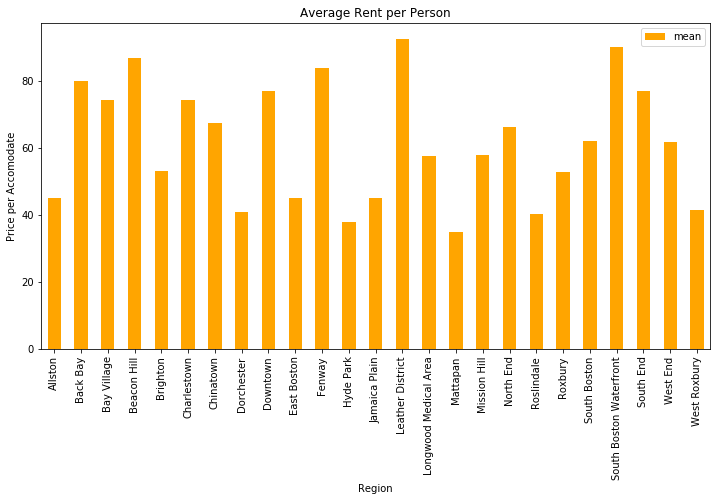

In [94]:
# plot comparing average rent per person in different regions in Boston

custom_plot(price_df1, 'neighbourhood_cleansed', 'price_per_accomodates', ['mean'], 'Region','Price per Accomodate', 'Average Rent per Person' )


## Q3. What are some features affecting average price of Airbnb Boston?

# Data Cleaning and Preperation
Filtering the columns to do the analysis required to answer the first question, removing extra symbols, converting data types when required and removing rows with Nan values

In [82]:
# creating data frame with columns containing features affecting airbnb prices

features_df1 = df1[['id', 'neighbourhood_cleansed', 'zipcode', 'property_type', 'room_type', 'accommodates', 
        'bathrooms', 'bedrooms',  'price']]

In [83]:
# adding price per accommodate column to feature_df1 dataframe
# limiting the decimal places upto 2 digits after decimal for easier visibility in plots

features_df1  = pd.concat([features_df1, price_df1['price_per_accomodates']], axis = 1).round(decimals=2)
features_df1.head()

,id,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,price,price_per_accomodates
0,12147973,Roslindale,02131,House,Entire home/apt,4,1.5,2.0,$250.00,62.5
1,3075044,Roslindale,02131,Apartment,Private room,2,1.0,1.0,$65.00,32.5
2,6976,Roslindale,02131,Apartment,Private room,2,1.0,1.0,$65.00,32.5
3,1436513,Roslindale,NaN,House,Private room,4,1.0,1.0,$75.00,NaN
4,7651065,Roslindale,02131,House,Private room,2,1.5,1.0,$79.00,39.5


In [55]:
features_df1['property_type'].unique()

array(['House', 'Apartment', 'Condominium', 'Villa', 'Bed & Breakfast',
       'Townhouse', 'Entire Floor', 'Loft', 'Guesthouse', 'Boat', 'Dorm',
       'Other', nan], dtype=object)

In [84]:
features_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3381 entries, 0 to 3562
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3381 non-null   int64  
 1   neighbourhood_cleansed  3381 non-null   object 
 2   zipcode                 3345 non-null   object 
 3   property_type           3378 non-null   object 
 4   room_type               3381 non-null   object 
 5   accommodates            3381 non-null   int64  
 6   bathrooms               3368 non-null   float64
 7   bedrooms                3371 non-null   float64
 8   price                   3381 non-null   object 
 9   price_per_accomodates   3319 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 290.6+ KB


In [85]:
## dropping rows with null in 'zipcode', 'property_type', 'bathrooms', 'bedrooms', 'price_per_accomodates'

price_df1 = price_df1.dropna(axis = 0, subset = ['zipcode', 'property_type', 'bathrooms', 'bedrooms', 'price_per_accomodates'])

# Exploratory Data Analysis
Plotting the results of analysis, questions will be explained in detail in medium article

### Property type vs price per accomodates

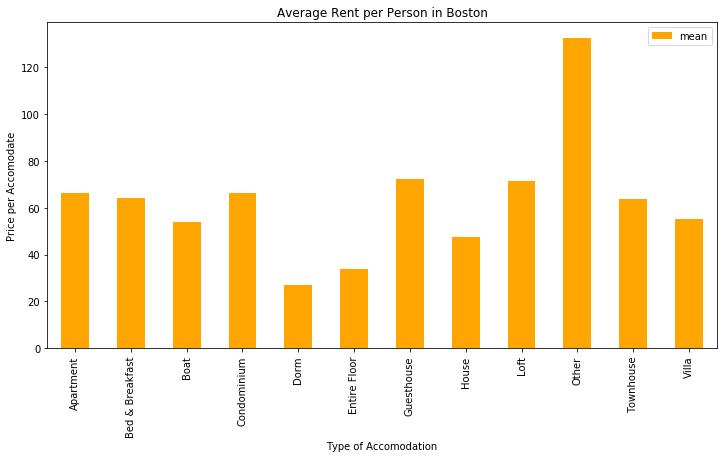

In [95]:
# plot average airbnb price per person vs type of accommodation

custom_plot(features_df1, 'property_type', 'price_per_accomodates', ['mean'], 'Type of Accomodation','Price per Accomodate', 'Average Rent per Person in Boston' )



### Price difference per property type in Leather District and Jamaica Plain


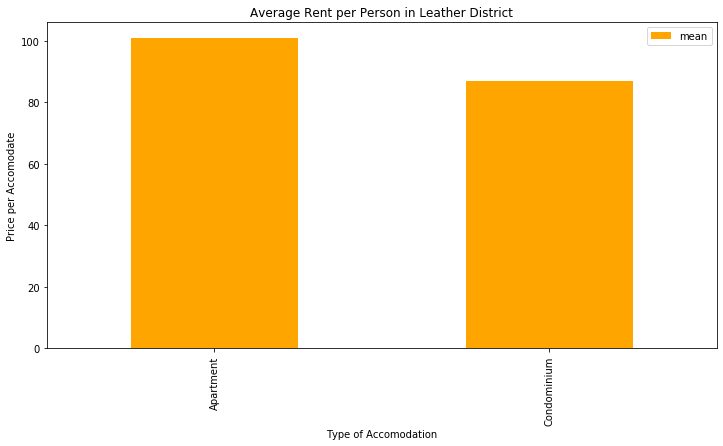

In [96]:
# ploting price per accommodate vs property type in Leather District which is the least popular places to stay in Boston

custom_plot(features_df1[features_df1.neighbourhood_cleansed == 'Leather District'], 'property_type', 'price_per_accomodates', ['mean'], 'Type of Accomodation','Price per Accomodate', 'Average Rent per Person in Leather District' )


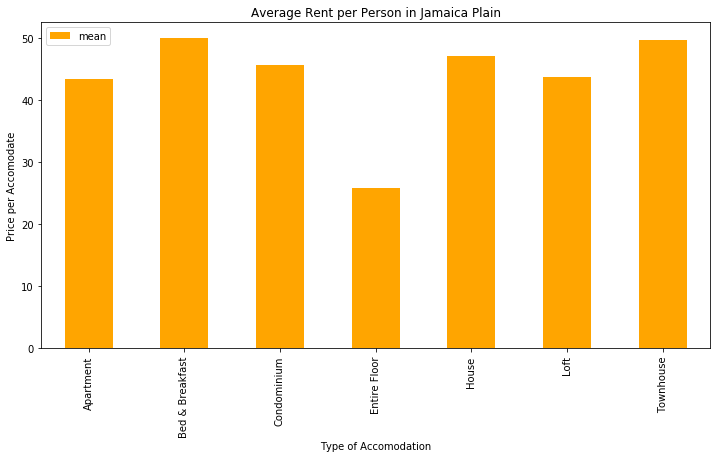

In [97]:
# ploting price per accommodate vs property type in Jamaica Plain which is the most popular places to stay in Boston

custom_plot(features_df1[features_df1.neighbourhood_cleansed == 'Jamaica Plain'], 'property_type', 'price_per_accomodates', ['mean'], 'Type of Accomodation','Price per Accomodate', 'Average Rent per Person in Jamaica Plain' )
